### Exploring Telco Customer Churn dataset

This notebook includes code and analysis for intital data exploration using pandas and matplotlib/ seaborn.

----

**Import packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style = 'white')

In [2]:
pwd

'/Users/pradeepsingh/cs696/Pradeep-Project-821368893/exploratory-data-analysis'

In [3]:
# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../data"))

['.DS_Store', 'transformed_data.csv', 'Telco-Customer-Churn.csv', 'processed_data.csv', 'scaled_data.csv', '.ipynb_checkpoints']


**Read the data**

In [4]:
telecom_cust = pd.read_csv('../data/Telco-Customer-Churn.csv')

** Preview the data **

In [5]:
# a quick look into data 
telecom_cust.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's check number of samples and features we have,

In [6]:
print('Dimensions of dataset:',telecom_cust.shape)
print('Number of Customers:',telecom_cust.customerID.nunique())

Dimensions of dataset: (7043, 21)
Number of Customers: 7043


So, we can see we have dataset with 7043 observations and for every observation there are 20 features.  

In [7]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# column/ feature values
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

**Check for any missing values**

In [11]:
# check for missing values
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Removing missing values 
telecom_cust.dropna(inplace = True)

In [13]:
# Remove customer IDs from the data set
df = telecom_cust.iloc[:,1:]

In [14]:
# Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [15]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)

**Correlation**

In [16]:
#Let's convert all the categorical variables into dummy variables
telecom_cust_dummies = pd.get_dummies(df_dummies)

In [17]:
telecom_cust_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


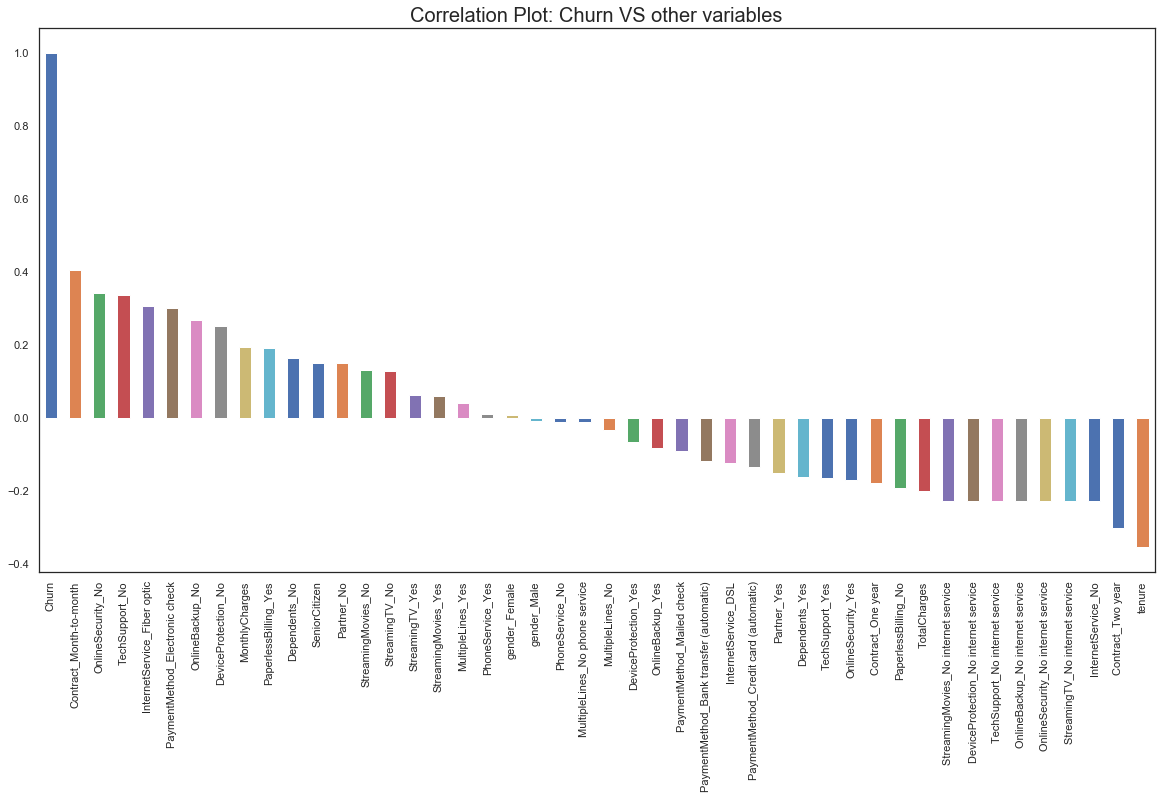

In [18]:
# Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
plt.title('Correlation Plot: Churn VS other variables',fontsize=20)
telecom_cust_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Insights**

From above plot we can see that, 
- *Month to month contracts*, *absence of online security* and *tech support* seem to be positively correlated with churn. 
- While, tenure, two year contracts seem to be negatively correlated with churn.
- Interestingly, services such as *Online security, streaming TV, online backup, tech support*, etc. without internet connection seem to be negatively related to churn.